# EDA Details

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sn

pd.set_option('display.max_columns', None)

Before our analysis, we need to know which featues in the SRA run table are more suitable to put in our model and get familliar with the gene matrix we have. To do this, we need to perform exploratory data analysis on the SRA run table and the gene matrix. 


## SRA run table

First, let us explore the SRA run table. Because there are too many features in this table, we selected only the columns that are relevant to our analysis (shown below).

As a reference, here are the brief introductions of some of the domain-specific features:

* NIA-R: The modified NIA-Reagan diagnosis of Alzheimer's disease is based on consensus recommendations for postmortem diagnosis of Alzheimer's disease. The criteria rely on both neurofibrillary tangles (Braak) and neuritic plaques (CERAD).


* LB stage: Lewy body dementia, also known as dementia with Lewy bodies, is the second most common type of progressive dementia after Alzheimer's disease dementia. Protein deposits, called Lewy bodies, develop in nerve cells in the brain regions involved in thinking, memory and movement (motor control). There are two diagnoses of LBD—dementia with Lewy bodies (DLB) and Parkinson's disease dementia. The earliest signs differ but reflect the same biological changes in the brain. Over time, people with dementia with Lewy bodies or Parkinson's disease dementia may develop similar symptoms.


* Braak staging refers to two methods used to classify the degree of pathology in Parkinson's disease and Alzheimer's disease. These methods are used both in research and for the clinical diagnosis of these diseases and are obtained by performing an autopsy of the brain.

In [2]:
features = ['expired_age', 'sex', 'PMI', 'sn_depigmentation', 'Braak score', 'TangleTotal', 'Plaque density', 
            'PlaqueTotal', 'CONDITION', 'BIOFLUID', 'TRANSCRIPTOME READS', 'REFERENCE GENOME READS', 
            'TRANSCRIPTOME GENOME RATIO', 'PlaqueF', 'PlaqueT', 'PlaqueH', 'PlaqueE', 'TangleF', 
            'TangleT', 'TangleH', 'TangleE', 'NIA-R', 'LB Stage', 'Run']

In [3]:
sra = pd.read_csv('../test/testdata/SraRunTable.csv', usecols=features)
sra.head()

CONDITION             BIOFLUID  TRANSCRIPTOME READS  \
0      Healthy Control  Cerebrospinal fluid              6883461   
1  Parkinson's Disease                Serum              2904451   
2  Alzheimer's Disease                Serum             12132405   
3  Parkinson's Disease  Cerebrospinal fluid              5560256   
4  Parkinson's Disease  Cerebrospinal fluid             12131859   

   REFERENCE GENOME READS  TRANSCRIPTOME GENOME RATIO  expired_age   PMI  \
0                 6923368                    0.994236           94  2.50   
1                 2953867                    0.983271           79  6.00   
2                12781881                    0.949188           81  2.50   
3                 5622788                    0.988879           79  2.50   
4                12219540                    0.992825           82  4.16   

   PlaqueF  PlaqueT  PlaqueH  PlaqueE  PlaqueTotal Plaque density  TangleF  \
0      3.0     3.00      3.0      3.0        15.00       frequent      1.0   
1      0.0     1.75      0.0      0.0         2.75         sparse      0.0   
2      2.5     2.50      2.5      2.0        11.50       frequent      1.6   
3      1.5     2.00      1.0      1.5         7.50       moderate      0.0   
4      0.0     0.00      0.0      0.0         0.00           zero      0.0   

   TangleT  TangleH  TangleE  TangleTotal Braak score             NIA-R  \
0     3.00      3.0      3.0        12.00          IV  criteria not met   
1     0.75      1.5      1.0         3.25          II  criteria not met   
2     2.50      3.0      3.0        11.10           V              high   
3     0.50      1.0      1.5         3.00          II               low   
4     0.50      3.0      3.0         6.50         III  criteria not met   

           LB Stage sn_depigmentation         Run     sex  
0    No Lewy bodies              none  SRR1568567    male  
1       Limbic type            severe  SRR1568730  female  
2    No Lewy bodies              mild  SRR1568666  female  
3  Neocortical type            severe  SRR1568510    male  
4       Limbic type            severe  SRR1568518  female

### Uniqueness of the Data

The first question is that does each subject has both cerebrospinal fluid and serum sample? Or there is only one sample from a single area of interest for one subject?

As we can see in the figure below, the anwser is the latter. So we need to keep in mind that there may exist cross-subject differences for samples of different biofluids

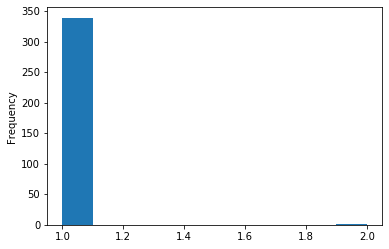

In [6]:
# Do all subjects have both CSF and serum?

# Different population
sra.Run.value_counts().plot.hist()

### Gender & Condition Breakdown

So, we broke down the samples into two groups based on biofluid, and then looked at the distribution of other variables, namely gender, expired age, PMI, total number of plaques, and total number of tangles.

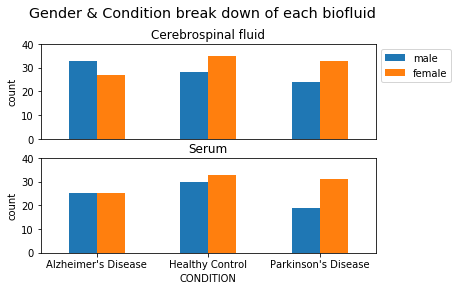

In [8]:
#sample furthur break-down by gender
cnt_summary_CSF = sra[sra['BIOFLUID']=='Cerebrospinal fluid'][['CONDITION', 'BIOFLUID', 'sex']].groupby(['CONDITION', 'sex']).count().unstack()
cnt_summary_serum = sra[sra['BIOFLUID']=='Serum'][['CONDITION', 'BIOFLUID', 'sex']].groupby(['CONDITION', 'sex']).count().unstack()
fig, (ax1, ax2) = plt.subplots(2, 1)
cnt_summary_CSF.plot.bar(ax = ax1)
ax1.legend(['male', 'female'], bbox_to_anchor=(1, 1))
ax1.set_title('Cerebrospinal fluid')
ax1.set_ylim(0,40)
ax1.set_ylabel('count')
ax1.xaxis.set_visible(False)

cnt_summary_serum.plot.bar(ax = ax2)
ax2.set_title('Serum')
ax2.legend().remove()
ax2.set_ylim(0,40)
ax2.set_ylabel('count')
plt.xticks(rotation = 0)
fig.suptitle('Gender & Condition break down of each biofluid', fontsize='x-large')
fig.subplots_adjust(top=0.85)

### Numerical Variables Distribution

/Users/xuanyuwu/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuanyuwu/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


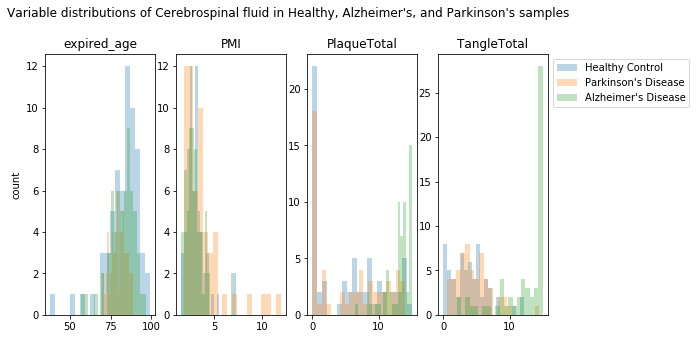

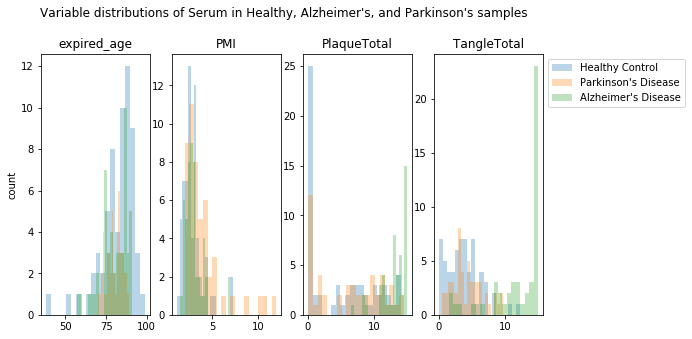

In [9]:

conditions = sra.CONDITION.unique()
biofluids = sra.BIOFLUID.unique()
num_bins = 20
variables = ['expired_age', 'PMI', 'PlaqueTotal', 'TangleTotal']
for i in biofluids:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_figheight(5)
    fig.set_figwidth(9)
    ax_arr = [ax1, ax2, ax3, ax4]
    fig.suptitle('Variable distributions of %s in Healthy, Alzheimer\'s, and Parkinson\'s samples' % i)
    fig.subplots_adjust(top=0.85)
    for j in conditions:
        for k in range(len(variables)):
            data = sra.loc[(sra['CONDITION']==j) & (sra['BIOFLUID']==i)][variables[k]]
            ax = ax_arr[k]
            ax.hist(data, bins=num_bins,label=j, alpha = 0.3)
            ax.set_title(variables[k])
            if k==0:
                ax.set_ylabel('count')
        ax.legend(bbox_to_anchor=(1, 1))
            
            

As shown above, although the distributions have slight differences, the distinction between the distribution of the samples of cerebrospinal fluid and that of serum is not significant. 

As mentioned previously, NIA-R is a measurement for diagnosing Alzheimer's disease. We wanted to validate if the values of the samples in our dataset reflect this claim.

### Distribution of NIA-R Broken Down By Conditions

Text(0.5, 1.0, "NIA-R Distribution of Healthy, Alzheimer's, and Parkinson's samples")

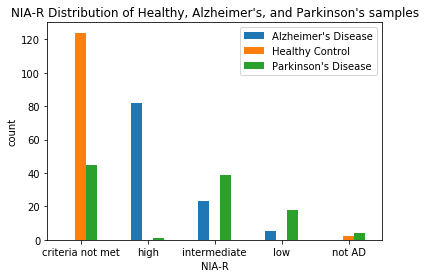

In [24]:
# distribution of NIA-R droken down by conditions

conditions = ['Alzheimer\'s Disease', 'Healthy Control', 'Parkinson\'s Disease']
nia_r = sra.groupby(['NIA-R','CONDITION']).size().to_frame()
nia_r.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('NIA-R Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

In the chart above, we saw that all the healthy control samples are either under the category "criteria not met" or "no AD". Surprisingly, although it is expected that most of the AD samples are under the category "high" there are some of the PD samples under "intermediate" and "low" categories. It might suggest that there exist some commonalities between AD and PD.


Then we did the similar thing for other measurements like LB stage, Substantia Nigra Depigmentation, and Braak score.

### Distribution of LB Stage Broken Down By Conditions

Text(0.5, 1.0, "LB Stage Distribution of Healthy, Alzheimer's, and Parkinson's samples")

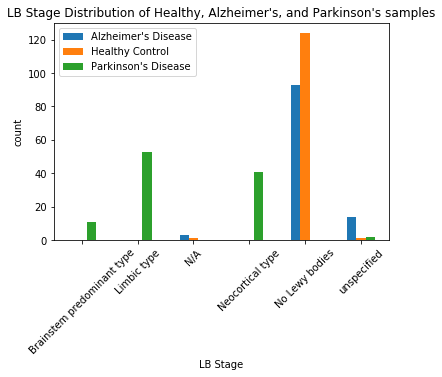

In [25]:
# distribution of LB Stage broken down by conditions
lb_mapper = {'LB pathology unspecified or not further assessed': 'unspecified', np.nan: 'N/A'}
sra['LB Stage'] = sra['LB Stage'].replace(lb_mapper)
lb_stage = sra.groupby(['LB Stage', 'CONDITION']).size().to_frame()
lb_stage.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 45)
plt.ylabel('count')
plt.title('LB Stage Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

Since lewy bodies are closely associated with Parkinson's disease, it is reasonable to see there are only Parkinson's samples in the LB stage categories. Among those samples, most of them are under limbic type and neocortical type. Under "No lewy bodies" category, there are no Parkinson's patients, which further proved that lewy bodies is specific to Parkinson's disease in our dataset.

### Distribution of SN Depigmentation Broken Down By Conditions

Text(0.5, 1.0, "Substantia Nigra Depigmentation Score Distribution of Healthy, Alzheimer's, and Parkinson's samples")

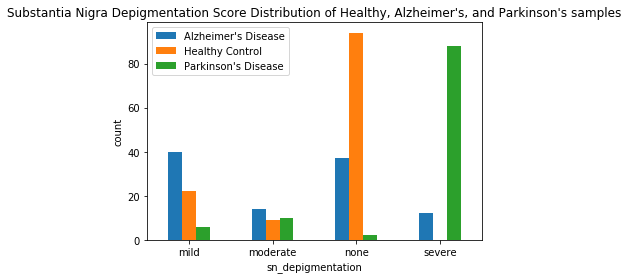

In [18]:
# sn depigmentation distributions broken down by conditions
# double check
conditions = ['Alzheimer\'s Disease', 'Healthy Control', 'Parkinson\'s Disease']
sn_dp = sra.groupby(['sn_depigmentation', 'CONDITION']).size().to_frame()
sn_dp.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('Substantia Nigra Depigmentation Score Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

According to [Peowe et al.](https://www.nature.com/articles/nrdp201713#Sec3), compared to control, parkinson's disease is defined by sn depigmentation. So it is intuitive to see the parkinson's group has the most severe cases. However, same as what happened in NIA-R distribution, there is not a clear separation between AD and PD, namely, there are still some AD patients in the "mild", "moderate", or even "severe" categories.


(Poewe, W., Seppi,K., Tanner, C. et al. Parkinson disease. Nat Rev Dis Primers 3, 17013 (2017). https://doi.org/10.1038/nrdp.2017.13)

### Distribution of Braak Score Broken Down By Conditions

Text(0.5, 1.0, "Braak Score Distribution of Healthy, Alzheimer's, and Parkinson's samples")

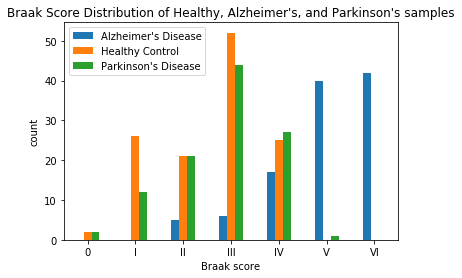

In [4]:
#braak distribution
conditions = ['Alzheimer\'s Disease', 'Healthy Control', 'Parkinson\'s Disease']
bs_cnts = sra.groupby(['Braak score','CONDITION']).size().to_frame()
bs_cnts.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('Braak Score Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

As mentioned in the beginning of the notebook, braak score is used to classify the degree of pathology in both PD and AD. However, in our dataset, although we can see a clearly different distribution for AD patients (the count increases as the stages go higher), there is no clear separation between the PD patients and the healthy control. It could be the case that this is what the data should look like, but we cannot exclude the possibility that there is something wrong with this feature (like wrong data entry, unspecified standard changes, etc..)

### Tangle & Plaque Counts Distribution in Each Brain Region Broken Down By Conditions

Because some of the categorical features above could not clearly divide groups, we wanted to see if the numerical features can achieve this separation.

Since tangles and plaques are important markers for AD, we are hoping to see different distribution of plaques and tangles in the AD group. In addition, we also wanted to know if the influence of disorder differs across brain regions. Therefore, we chose four brain regions(Frontal, Temporal, Hippocampal, and Entorhinal) and plotted the distributions of plaques and tangles of all three groups respectively.

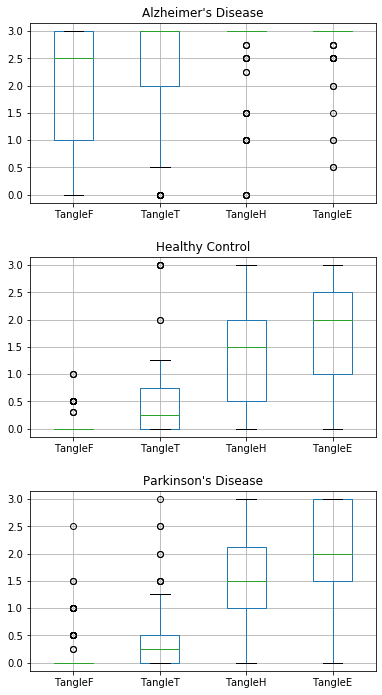

In [9]:
# Tangle counts distribution in each brain region broken down by contidions
plaques = sra[['CONDITION', 'TangleF', 'TangleT', 'TangleH', 'TangleE']]
plaques.groupby('CONDITION').boxplot(figsize=(6, 12), layout=(3, 1))
plt.subplots_adjust(hspace = 0.3)

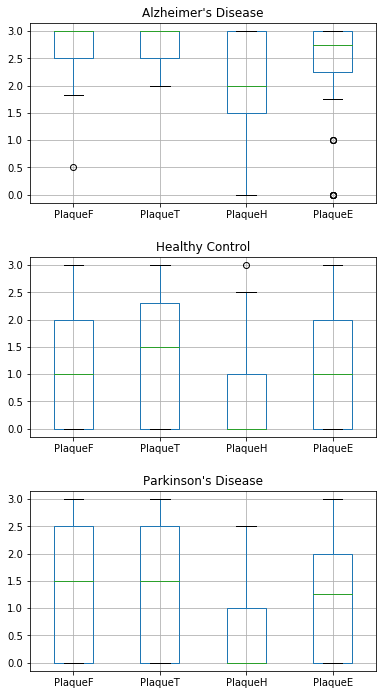

In [10]:
# Plaque counts distribution in each brain region broken down by contidions
plaques = sra[['CONDITION', 'PlaqueF', 'PlaqueT', 'PlaqueH', 'PlaqueE']]
plaques.groupby('CONDITION').boxplot(figsize=(6, 12), layout=(3, 1))
plt.subplots_adjust(hspace = 0.3)

The plots above show that the distribution of tangles and plaques of AD group is different to other groups as expected. However, the difference between PD and healthy control is not significant.

**------------TODO:  Add in interpretation of brain regions-------------------**


### Correlation of Plaque Total and Tangle Total Broken Down By Conditions

We have seen that the overall correlation between Plaque total and plaque total in both biofluid samples are high, but after previous investigation, we know that the distribution of those two measurements are different for AD group. Therefore, it is reasonable to furthur investigate those two correlations by breaking them down by conditions.

#### Cerebrospinal fluid

In [8]:
sra[sra.BIOFLUID=='Cerebrospinal fluid'].groupby('CONDITION')[['PlaqueTotal', 'TangleTotal']].corr()

PlaqueTotal  TangleTotal
CONDITION                                                
Alzheimer's Disease PlaqueTotal     1.000000     0.676371
                    TangleTotal     0.676371     1.000000
Healthy Control     PlaqueTotal     1.000000     0.424364
                    TangleTotal     0.424364     1.000000
Parkinson's Disease PlaqueTotal     1.000000     0.484219
                    TangleTotal     0.484219     1.000000

#### Serum

In [7]:
sra[sra.BIOFLUID=='Serum'].groupby('CONDITION')[['PlaqueTotal', 'TangleTotal']].corr()

PlaqueTotal  TangleTotal
CONDITION                                                
Alzheimer's Disease PlaqueTotal     1.000000     0.681418
                    TangleTotal     0.681418     1.000000
Healthy Control     PlaqueTotal     1.000000     0.424554
                    TangleTotal     0.424554     1.000000
Parkinson's Disease PlaqueTotal     1.000000     0.505350
                    TangleTotal     0.505350     1.000000

The above matrix showed that althought the plaque total and tangle total in all three groups have fairly high correlation, AD group contributed the most to the high correlation between the two variables.

In [9]:
# redundant features? 
# Maybe don't include this??
# distributions of plaque total values correspond to each plaque density category
pd.DataFrame(group.describe().rename(columns={'PlaqueTotal':name}).squeeze()  for name, group in sra[['Plaque density', 'PlaqueTotal']].groupby('Plaque density'))


count       mean       std   min     25%    50%     75%    max
frequent  115.0  13.227217  1.813332  6.50  12.915  13.50  14.875  15.00
moderate   95.0   9.539579  2.865883  1.75   7.250   9.75  11.500  14.25
sparse     47.0   5.507447  3.395009  0.50   2.475   5.30   7.500  12.00
zero       86.0   0.462209  1.685805  0.00   0.000   0.00   0.000  12.75

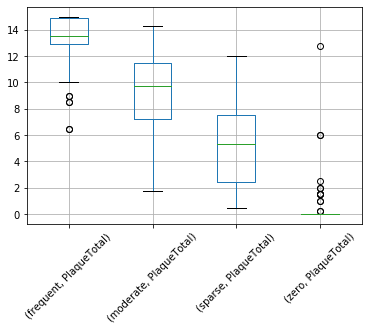

In [15]:
sra[['Plaque density', 'PlaqueTotal']].groupby('Plaque density').boxplot(subplots=False,rot=45)

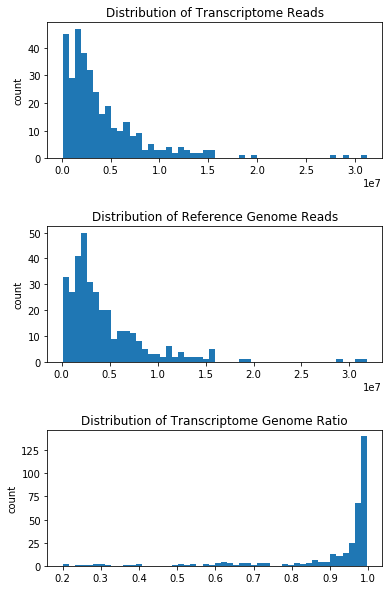

In [10]:
# Distributions of reads of all samples
# Maybe don't include this??
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.hist(sra['TRANSCRIPTOME READS'], bins=50)
ax1.set_title('Distribution of Transcriptome Reads')
ax1.set_ylabel('count')
ax2.hist(sra['REFERENCE GENOME READS'], bins=50)
ax2.set_title('Distribution of Reference Genome Reads')
ax2.set_ylabel('count')
ax3.hist(sra['TRANSCRIPTOME GENOME RATIO'], bins=50)
ax3.set_title('Distribution of Transcriptome Genome Ratio')
ax3.set_ylabel('count')
fig.subplots_adjust(hspace = 0.5)
fig.set_figheight(10)

## Gene Matrix

Another important step before we step into the formal analysis is to get famillar with our gene matrix. Here, we explored some basic properties including counts, missingness, basic distributions and basic correlations.

### Missingness of the Sequences

In [18]:
gm_full = pd.read_csv('gene_matrix_full.tsv', sep='\t', index_col=0)
gm_full.head()

SRR1568461  SRR1568545  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 NaN        26.0   
ENST00000441548.1:protein_coding:CECR1-005            NaN         NaN   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568370  SRR1568515  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 NaN         NaN   
ENST00000441548.1:protein_coding:CECR1-005            NaN         NaN   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568742  SRR1568430  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 NaN         NaN   
ENST00000441548.1:protein_coding:CECR1-005            NaN         NaN   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568625  SRR1568660  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 1.0        31.0   
ENST00000441548.1:protein_coding:CECR1-005            NaN         NaN   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568427  SRR1568576  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 NaN         2.0   
ENST00000441548.1:protein_coding:CECR1-005            NaN         1.0   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568424  SRR1568748  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 3.0         4.0   
ENST00000441548.1:protein_coding:CECR1-005            NaN         1.0   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568599  SRR1568636  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 2.0         NaN   
ENST00000441548.1:protein_coding:CECR1-005            1.0         NaN   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568408  SRR1568437  \
ENST00000555437.1:protein_coding:KIAA1737-002         NaN         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 1.0         1.0   
ENST00000441548.1:protein_coding:CECR1-005            NaN         NaN   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568482  SRR1568746  \
ENST00000555437.1:protein_coding:KIAA1737-002         1.0         NaN   
ENST00000386910.1:snoRNA:SNORD105-201                 5.0         1.0   
ENST00000441548.1:protein_coding:CECR1-005            NaN         1.0   
ENST00000497672.1:retained_intron:TIA1-019            NaN         NaN   
ENST00000537147.1:protein_coding:DARC-201             NaN         NaN   

                                               SRR1568727  SRR1568603  \
ENST00000555437.1:prote

In the full gene matrix that includes all the sequences, we have a lot of NaN vaules because not every sequence is detected in our sample.

We started by looking at how many sequences are missing for one sample and how many samples do not have a certain sequece, that is, the number of missing value of the columns and rows of the above table

Text(0.5, 0, '# of samples without a specific miRNA sequence')

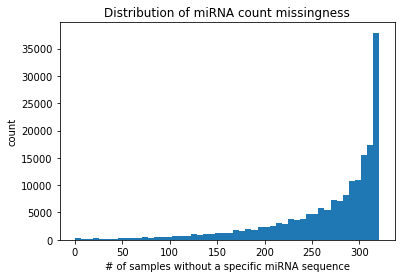

In [74]:
# miRNA count missingness
num_missing_seq = gm_full.isna().sum(axis = 1)
plt.hist(num_missing_seq,bins=50)
plt.title('Distribution of miRNA count missingness')
plt.ylabel('count')
plt.xlabel('# of samples without a specific miRNA sequence')

Text(0.5, 0, '# of miRNA missing in a specific sample')

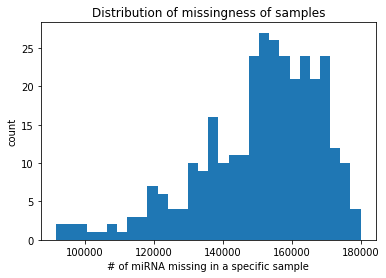

In [75]:
# missingness of the samples
num_missing_samp = gm_full.isna().sum(axis = 0)
plt.hist(num_missing_samp, bins=30)
plt.title('Distribution of missingness of samples')
plt.ylabel('count')
plt.xlabel('# of miRNA missing in a specific sample')

We have noticed that the index of the gene matrix include the following informaition: an ID, a sequence type, and a sequence name. So we extracted this information into a nicer form.

In [76]:
# missingness of each type
split_info_full = gm_full.index.to_series().apply(lambda x: x.split(':')).reset_index(drop=True)
ids_full = split_info_full.apply(lambda x: x[0])
seq_type_full = split_info_full.apply(lambda x: x[1])
seq_name_full = split_info_full.apply(lambda x: x[2])
split_info_full = pd.DataFrame({'IDs':ids_full, 'Seq_type':seq_type_full, 'Seq_name':seq_name_full})
split_info_full.head()

IDs         Seq_type      Seq_name
0  ENST00000555437.1   protein_coding  KIAA1737-002
1  ENST00000386910.1           snoRNA  SNORD105-201
2  ENST00000441548.1   protein_coding     CECR1-005
3  ENST00000497672.1  retained_intron      TIA1-019
4  ENST00000537147.1   protein_coding      DARC-201

After extracting the informations of each sequence, we found the unique types of sequences are the following:

In [41]:
split_info_full.Seq_type.unique()

array(['protein_coding', 'snoRNA', 'retained_intron',
       'nonsense_mediated_decay', 'processed_transcript', 'lincRNA',
       'antisense', 'misc_RNA', 'IG_C_gene', 'processed_pseudogene',
       'unprocessed_pseudogene', 'sense_overlapping', 'snRNA',
       'pseudogene', 'miRNA', 'transcribed_processed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'rRNA', 'TR_C_gene',
       'sense_intronic', 'unitary_pseudogene', 'non_stop_decay',
       'IG_V_pseudogene', 'IG_V_gene', 'polymorphic_pseudogene',
       'TR_V_gene', 'IG_C_pseudogene', '3prime_overlapping_ncrna',
       'IG_J_gene', 'TR_V_pseudogene', 'TR_J_gene', 'Mt_tRNA',
       'translated_processed_pseudogene', 'Mt_rRNA'], dtype=object)

Therefore, we can calculate the ratio of missing value (# of missing value / total # of sequences belong to this type) of each type. Since we have one count of missing values for each sample, we simply took the mean of those numbers as the overall representation of the missing value count. The reason we used ratio instead of count is that not all types of sequence are evenly represented in our dataset. For example, one type may have 10000 sequences but the other one may only have 5. Therefore, the ratio between missing count and total count better reflects the true missingness distribution.

Text(0, 0.5, 'Missing/Total')

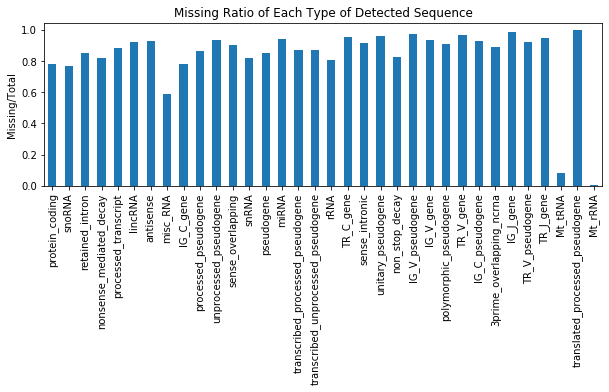

In [72]:
missing_ratio = {}
for i in split_info_full.Seq_type.unique():
    inds = split_info_full.index[split_info_full.Seq_type==i]
    cnt = len(inds)
    missing = gm_full.iloc[inds, :].isna().sum(axis = 0).mean()
    ratio = missing/cnt
    missing_ratio[i] = ratio
pd.DataFrame.from_dict(missing_ratio,orient='index', columns=['Missing/Total']).plot(kind='bar', legend=None,figsize=(10,3))
plt.title('Missing Ratio of Each Type of Detected Sequence')
plt.ylabel('Missing/Total')

To avoid any potential influence on our downstream analysis, we have removed all the sequences that is missing in any of the samples. Before removing, we had 181955 sequences and 434 after removing.

In [77]:
gm = pd.read_csv('gene_matrix.tsv', sep='\t', index_col=0)
gm.head()

SRR1568461  SRR1568545  \
ENST00000538654.1:retained_intron:SNHG1-003        20.0       970.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           57.0        53.0   
ENST00000363640.1:misc_RNA:RNY4P2-201              97.0        94.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           33.0         3.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201           23.0         2.0   

                                             SRR1568370  SRR1568515  \
ENST00000538654.1:retained_intron:SNHG1-003         2.0        41.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           53.0        22.0   
ENST00000363640.1:misc_RNA:RNY4P2-201             107.0        14.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           25.0         2.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201           12.0         1.0   

                                             SRR1568742  SRR1568430  \
ENST00000538654.1:retained_intron:SNHG1-003        12.0         4.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           34.0        50.0   
ENST00000363640.1:misc_RNA:RNY4P2-201              30.0       108.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           10.0        37.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201            4.0        12.0   

                                             SRR1568625  SRR1568660  \
ENST00000538654.1:retained_intron:SNHG1-003       113.0       613.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           68.0       107.0   
ENST00000363640.1:misc_RNA:RNY4P2-201              51.0       100.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           18.0        10.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201            2.0        16.0   

                                             SRR1568427  SRR1568576  \
ENST00000538654.1:retained_intron:SNHG1-003        24.0        20.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           27.0        66.0   
ENST00000363640.1:misc_RNA:RNY4P2-201              24.0       134.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201            1.0        35.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201            3.0        16.0   

                                             SRR1568424  SRR1568748  \
ENST00000538654.1:retained_intron:SNHG1-003        75.0       410.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           87.0        98.0   
ENST00000363640.1:misc_RNA:RNY4P2-201             181.0       113.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           28.0        23.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201           13.0         6.0   

                                             SRR1568599  SRR1568636  \
ENST00000538654.1:retained_intron:SNHG1-003       107.0        21.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201          174.0        10.0   
ENST00000363640.1:misc_RNA:RNY4P2-201             196.0        11.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201          123.0         2.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201           28.0         2.0   

                                             SRR1568408  SRR1568437  \
ENST00000538654.1:retained_intron:SNHG1-003        27.0        40.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           84.0        61.0   
ENST00000363640.1:misc_RNA:RNY4P2-201             125.0        79.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           65.0        17.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201           17.0        10.0   

                                             SRR1568482  SRR1568746  \
ENST00000538654.1:retained_intron:SNHG1-003        56.0        45.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           78.0        18.0   
ENST00000363640.1:misc_RNA:RNY4P2-201             219.0        31.0   
ENST00000363338.1:misc_RNA:Y_RNA.134-201           68.0         5.0   
ENST00000365063.1:misc_RNA:Y_RNA.339-201           24.0         7.0   

                                             SRR1568727  SRR1568603  \
ENST00000538654.1:retained_intron:SNHG1-003        68.0        86.0   
ENST00000516950.1:misc_RNA:Y_RNA.790-201           49.0     

In [78]:
gm_full.shape

(181955, 322)

In [79]:
gm.shape

(434, 322)

Then, we wanted to know how many sequences there are for each sequence type. So we did the similar analysis as above but for the counts of the sequence.

In [13]:
split_info = gm.index.to_series().apply(lambda x: x.split(':')).reset_index(drop=True)
ids = split_info.apply(lambda x: x[0])
seq_type = split_info.apply(lambda x: x[1])
seq_name = split_info.apply(lambda x: x[2])
split_info = pd.DataFrame({'IDs':ids, 'Seq_type':seq_type, 'Seq_name':seq_name})
split_info.head()

IDs         Seq_type       Seq_name
0  ENST00000538654.1  retained_intron      SNHG1-003
1  ENST00000516950.1         misc_RNA  Y_RNA.790-201
2  ENST00000363640.1         misc_RNA     RNY4P2-201
3  ENST00000363338.1         misc_RNA  Y_RNA.134-201
4  ENST00000365063.1         misc_RNA  Y_RNA.339-201

In [24]:
split_info.Seq_type.unique()

array(['retained_intron', 'misc_RNA', 'protein_coding', 'snRNA',
       'processed_pseudogene', 'processed_transcript', 'lincRNA',
       'snoRNA', 'antisense', 'Mt_tRNA', 'nonsense_mediated_decay',
       'pseudogene', 'transcribed_processed_pseudogene', 'Mt_rRNA'],
      dtype=object)

Text(0, 0.5, 'count')

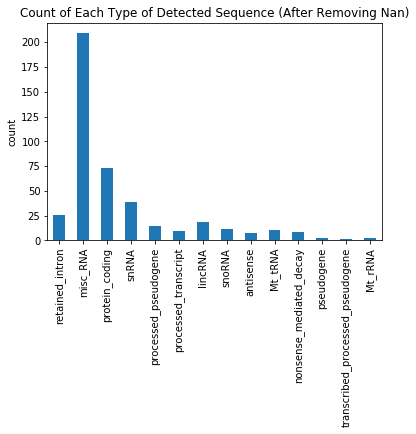

In [64]:
# bar chart for the count of each type of seq
seq_cnts = {}
for i in split_info.Seq_type.unique():
    cnt = sum(split_info.Seq_type==i)
    seq_cnts[i]=cnt
pd.DataFrame.from_dict(seq_cnts,orient='index', columns=['Count']).plot(kind='bar', legend=None)
plt.title('Count of Each Type of Detected Sequence (After Removing Nan)')
plt.ylabel('count')

Finally, before more in-depth analysis, we wanted to know the rough distribution of values and its correlation with some of the basic numerical features for each sequence and hoping to find some interesting trends. 

**--------------------Pick the sequeces of interest--------------------------**

In [193]:
gm_reind = gm.rename(index=dict(zip(gm.index, split_info.Seq_name))).T
gm_reind.head()

SNHG1-003  Y_RNA.790-201  RNY4P2-201  Y_RNA.134-201  \
SRR1568461       20.0           57.0        97.0           33.0   
SRR1568545      970.0           53.0        94.0            3.0   
SRR1568370        2.0           53.0       107.0           25.0   
SRR1568515       41.0           22.0        14.0            2.0   
SRR1568742       12.0           34.0        30.0           10.0   

            Y_RNA.339-201  EIF4A2-010  Y_RNA.110-201  SAR1A-001  CANX-201  \
SRR1568461           23.0        12.0          102.0        4.0       6.0   
SRR1568545            2.0       488.0           10.0        8.0       1.0   
SRR1568370           12.0         3.0           87.0        2.0      10.0   
SRR1568515            1.0         1.0            3.0        1.0     140.0   
SRR1568742            4.0         5.0           41.0        1.0       5.0   

            RNVU1-18-201  Y_RNA.233-201  Y_RNA.491-201  Y_RNA.676-201  \
SRR1568461          94.0           51.0           18.0           21.0   
SRR1568545          48.0           10.0            7.0            2.0   
SRR1568370          67.0           27.0           13.0           14.0   
SRR1568515          28.0            1.0            2.0            1.0   
SRR1568742          32.0           13.0            6.0            6.0   

            Y_RNA.391-201  EEF1A1P13-001  EEF1A1-014  RNU2-29P-201  \
SRR1568461           47.0           80.0        62.0           6.0   
SRR1568545            5.0            9.0        14.0         100.0   
SRR1568370           37.0           62.0        38.0          12.0   
SRR1568515            2.0            1.0         1.0           2.0   
SRR1568742           18.0            3.0         2.0          17.0   

            RP11-553P9.1-001  RNU1-27P-201  RN7SL732P-201  Y_RNA.148-201  \
SRR1568461              27.0          94.0           30.0          225.0   
SRR1568545              11.0          48.0            5.0           37.0   
SRR1568370              33.0          67.0           57.0          209.0   
SRR1568515               1.0          28.0            1.0            6.0   
SRR1568742               1.0          32.0            1.0           91.0   

            RNU12-001  RN7SL181P-201  Y_RNA.256-201  Y_RNA.481-201  \
SRR1568461       21.0            9.0          120.0           47.0   
SRR1568545       62.0           18.0           48.0            9.0   
SRR1568370       17.0           21.0           96.0           28.0   
SRR1568515        5.0            3.0           21.0            1.0   
SRR1568742       15.0           11.0           89.0           12.0   

            Y_RNA.197-201  SNORD3B-2-001  Y_RNA.503-201  RNU2-61P-201  \
SRR1568461           20.0           74.0          106.0          49.0   
SRR1568545            1.0          460.0           10.0         390.0   
SRR1568370           31.0           39.0           87.0          44.0   
SRR1568515            1.0           22.0            3.0          11.0   
SRR1568742           12.0           13.0           41.0          85.0   

            Y_RNA.125-201  Y_RNA.412-201  GNAS-201  SNORD3B-1-201  \
SRR1568461          280.0           88.0      15.0           67.0   
SRR1568545           20.0           15.0       2.0          290.0   
SRR1568370          111.0          123.0      14.0           38.0   
SRR1568515            6.0            7.0       1.0           11.0   
SRR1568742           92.0           59.0       8.0           11.0   

            RNY4P17-201  Y_RNA.592-201  Y_RNA.311-201  RNY3-201  RNU1-1-201  \
SRR1568461         53.0           76.0           58.0     354.0        94.0   
SRR1568545         81.0            9.0            9.0      57.0        48.0   
SRR1568370         64.0           65.0           28.0     417.0        67.0   
SRR1568515         37.0            2.0            1.0      14.0        28.0   
SRR1568742         22.0           32.0           15.0     167.0        32.0   

            Y_RNA.733-201  RNU1-67P-201  EEF1A1P5-001  RP11-640M9.1-006  \
SRR1

In [197]:
selected_ft = sra[['Run','CONDITION','expired_age', 'PMI', 'PlaqueTotal', 'TangleTotal',
                   'Braak score', 'sn_depigmentation']]
selected_ft = selected_ft.replace({'sn_depigmentation':{'none':0, 'nan':0, 'mild':1, 'moderate':2, 'severe':3},
                                   'Braak score':{'0':0, 'I':1, 'II':2, 'III':3, 'IV':4, 'V':5, 
                                                  'VI':6}}).set_index('Run')
alz_ft = selected_ft[selected_ft.CONDITION=='Alzheimer\'s Disease'].drop('CONDITION', axis=1)
park_ft = selected_ft[selected_ft.CONDITION=='Parkinson\'s Disease'].drop('CONDITION', axis=1)

alz_tbl = alz_ft.merge(gm_reind, left_index=True, right_index=True, how='inner')
park_tbl = park_ft.merge(gm_reind, left_index=True, right_index=True, how='inner')

num_fts = 6
alz_gm = alz_tbl.iloc[:, num_fts:]
park_gm = park_tbl.iloc[:, num_fts:]

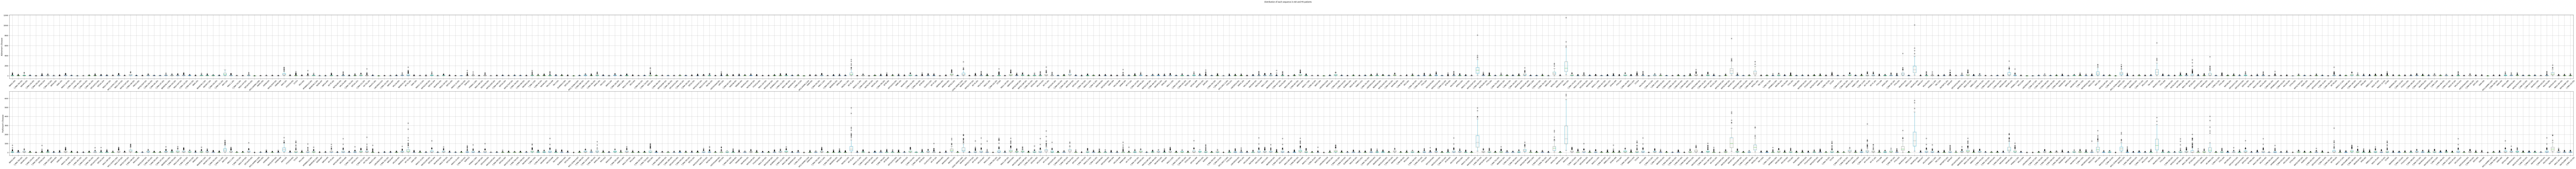

In [210]:
fig, axes= plt.subplots(nrows=2, ncols=1, figsize=(240, 16))
alz_gm.boxplot(ax = axes.flatten()[0])
axes.flatten()[0].set_xticklabels(alz_gm.columns, rotation=45)
park_gm.boxplot(ax = axes.flatten()[1])
axes.flatten()[1].set_xticklabels(park_gm.columns, rotation=45)
rows = ['Alzheimer\'s Disease','Parkinson\'s Disease']
for ax, row in zip(axes, rows):
    ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout()
fig.suptitle('Distribution of each sequence in AD and PD patients ')
fig.subplots_adjust(top=0.9)
plt.show()

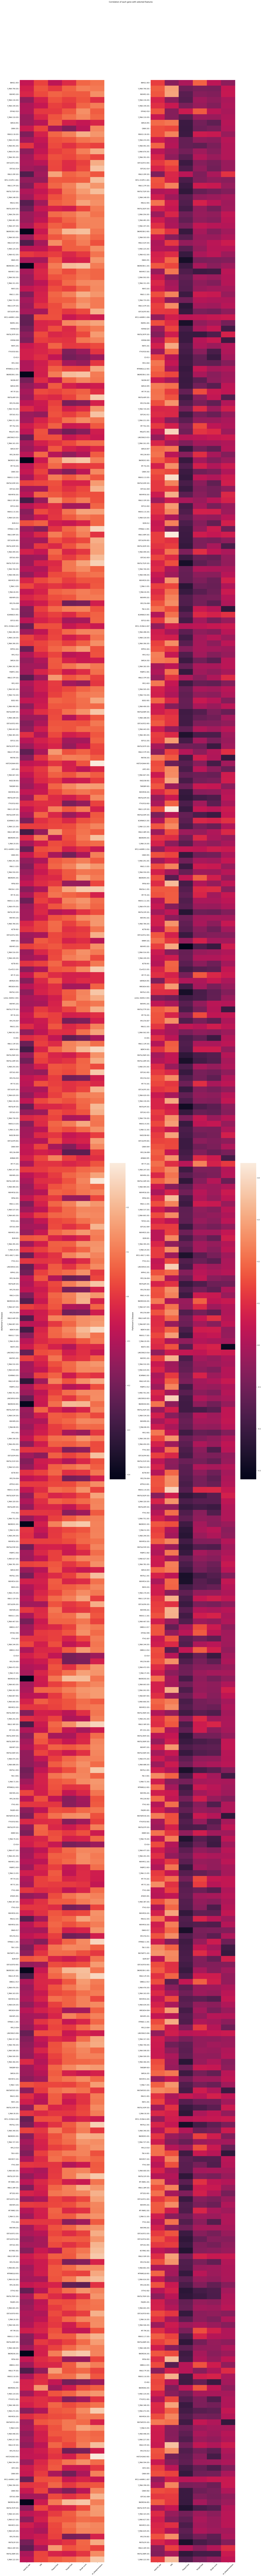

In [213]:
def get_corr_df(num_fts, fts_names, tbl):
    corr_df = pd.DataFrame()
    for i in range(num_fts):
        corr = tbl[tbl.columns[num_fts:]].apply(lambda x: x.corr(tbl.iloc[:,i]))
        corr_df[fts_names[i]] = corr
    return corr_df


fts_names = selected_ft.drop('CONDITION', axis=1).columns
tbl_arr = [alz_tbl, park_tbl]
cols = ['Alzheimer\'s Disease','Parkinson\'s Disease']
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(24, 240))
ind = 0
for tbl in tbl_arr:
    corr_df = get_corr_df(num_fts, fts_names, tbl)
    sn.heatmap(corr_df, ax = axes.flatten()[ind])
    axes.flatten()[ind].set_xticklabels(fts_names, rotation=45)
    ind = ind+1

for ax, col in zip(axes, cols):
    ax.set_ylabel(col, rotation=90, size='large')
fig.tight_layout()
fig.suptitle('Correlation of each gene with selected features ')
fig.subplots_adjust(top=0.95)
plt.show()